# Classifying NBA Players into Performance Categories

### Introduction:
       
The objective of the project is to predict NBA players into performance categories based on their age, minutes played, and field goal attempts. The plan is to use regression analysis to estimate the average number of  points a player will score per game. We aim to answer the predictive question: Can one use a NBA player’s age, playing time, and field goal attempts to predict the number of points they will score per game on average? 
       
Only players who play center position will be included in the final dataset to ensure that the predicted performance is not influenced by their position, as different positions come with varying opportunities to score.
        
The selected dataset shows NBA player stats during the regular season from 2022-2023. The dataset was created by an international organization called Creative Commons (CC) that aims to supply the world with knowledge that serves the public interest. The dataset is updated consistently to maintain the accuracy of the statistics.


### Methods:

The variables/columns used will be Age (player’s age), MP (minutes played per game),and  FGA (field goal attempts) to create a predictive model for PTS (points per game scored by player).
    
The dataset encompasses players with multiple positions, therefore in order to fairly analyze each player’s performance, the filter function will be used to only include players who play C (center).
        
To visualize the relationships between age, minutes played per game, field goal attempts, and points scored per game, three scatterplots side-by-side to visualize the data. 


### Expected Outcomes and Significance

A clear trend in the number of points scored by a player per game in relation to their age, play time, and field goal attempts is expected to be found. These findings will hold significance when it comes to NBA player analysis for scouting and drafting.
    
This dataset may lead to further questions such as: What other aspects of players can be measured to determine who will be the most successful? Can the founded patterns and trends be applied to improve basketball worldwide and increase the performance of international teams? By finding ways to numerically measure a player’s stats, we can refine the evaluation process in the NBA.


### Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In order to wrangle the data we first have to load in all the necessary libraries in order to utilize the functions they provide. We load in the tidyverse package as it is helpful for data visualization and has functions such as ggplot, and we load in tidymodels for the regression that will be done later on. 

In [2]:
url <- "https://raw.githubusercontent.com/likaishin/dsci_basketball_project/main/NBA_Player_Stats_Regular.csv?token=GHSAT0AAAAAACKWXG4PH2FI6EQPOWAJUUG6ZLRFPKA"
player_data <- read_delim(url, delim = ";")
player_data_numeric <- player_data |>
    mutate(Age = as.numeric(Age),
           PTS = as.numeric(PTS),
           FGA = as.numeric(FGA))
player_data_numeric

Rows: 679 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (3): Player, Pos, Tm
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,⋯,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,⋯,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,⋯,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,⋯,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,⋯,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,⋯,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,⋯,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,⋯,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4


As this data frame is alread in tidy format, we do not have to wrangle the data. 

In [3]:
player_data_filter <- filter(player_data_numeric, Pos == "C" & G >= 20)
player_data_filter

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,⋯,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,⋯,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,⋯,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,⋯,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3
17,Deandre Ayton,C,24,PHO,67,67,30.4,7.8,13.2,⋯,0.760,2.6,7.4,10.0,1.7,0.6,0.8,1.8,2.8,18.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
530,James Wiseman,C,21,TOT,45,22,19.3,4.2,7.5,⋯,0.701,1.6,4.3,5.9,0.7,0.2,0.6,1.1,2.4,10.0
530,James Wiseman,C,21,GSW,21,0,12.5,2.8,4.5,⋯,0.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9
530,James Wiseman,C,21,DET,24,22,25.2,5.4,10.2,⋯,0.712,2.3,5.8,8.1,0.7,0.2,0.8,1.5,2.9,12.7


We selected the players who are only playing the center position, as this is the position we selected to run our regression on. We also filtered the dataframe into centers who have played more than 20 games in order to increase the accuracy of our data and avoid any biases. 

In [4]:
player_data_select <- select(player_data_filter, Age, MP, FGA, PTS)
player_data_select 

Age,MP,FGA,PTS
<dbl>,<dbl>,<dbl>,<dbl>
23,20.7,7.3,9.2
29,27.0,6.3,8.6
25,34.6,14.9,20.4
24,32.6,9.2,14.3
24,30.4,13.2,18.0
⋮,⋮,⋮,⋮
21,19.3,7.5,10.0
21,12.5,4.5,6.9
21,25.2,10.2,12.7


In [5]:
set.seed(2020)
player_data_split <- initial_split(player_data_select, prop = 0.75, strata = PTS)
player_data_training <- training(player_data_split)
player_data_training
player_data_testing <- testing(player_data_split)
player_data_testing

Age,MP,FGA,PTS
<dbl>,<dbl>,<dbl>,<dbl>
23,10.0,2.0,3.5
30,8.1,1.6,2.2
23,9.6,2.5,3.3
30,14.3,3.4,4.3
33,11.5,3.8,3.9
⋮,⋮,⋮,⋮
26,29.4,11.8,18.0
30,24.9,10.3,14.1
32,33.5,14.0,17.6


Age,MP,FGA,PTS
<dbl>,<dbl>,<dbl>,<dbl>
24,15.7,4.9,6.6
24,17.0,5.4,7.3
23,12.0,3.3,4.4
23,8.2,2.7,4.3
28,26.6,8.2,12.0
⋮,⋮,⋮,⋮
27,32.6,15.7,23.2
21,11.5,3.6,4.7
28,37.4,18.5,24.2


Next, we select only the columns that we will utilize in the regression, the columns being age, MP (average minutes played per game), FGA (average field goal attempts per game), and PTS (average points scored per game). 

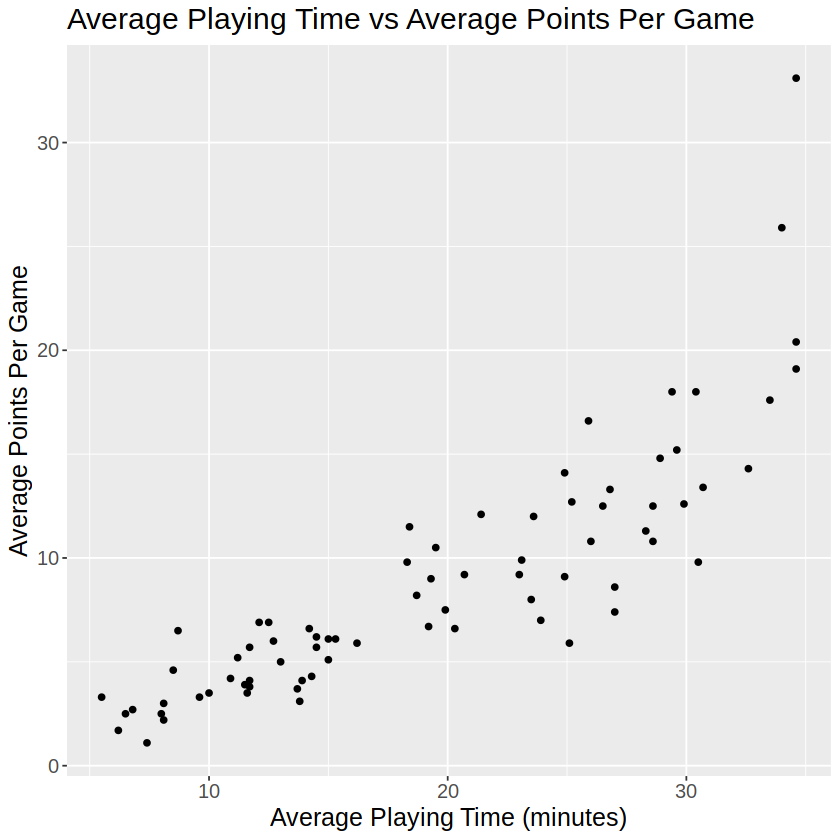

In [6]:
play_plot_1 <- ggplot(player_data_training, aes(x = MP, y = PTS))+
                geom_point()+
                xlab("Average Playing Time (minutes)") +
                ylab("Average Points Per Game")+
                ggtitle("Average Playing Time vs Average Points Per Game") +
                theme(text = element_text(size=15))
play_plot_1

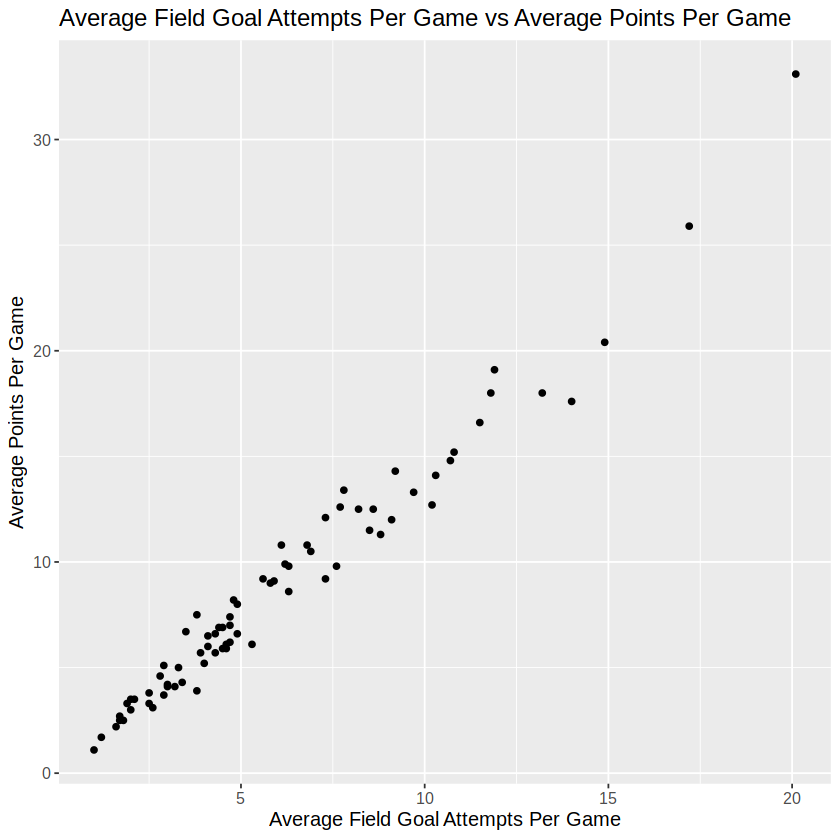

In [7]:
play_plot_2 <- ggplot(player_data_training, aes(x = FGA, y = PTS))+
                geom_point()+
                xlab("Average Field Goal Attempts Per Game") +
                ylab("Average Points Per Game") +
                ggtitle("Average Field Goal Attempts Per Game vs Average Points Per Game") +
                theme(text = element_text(size=12))
play_plot_2

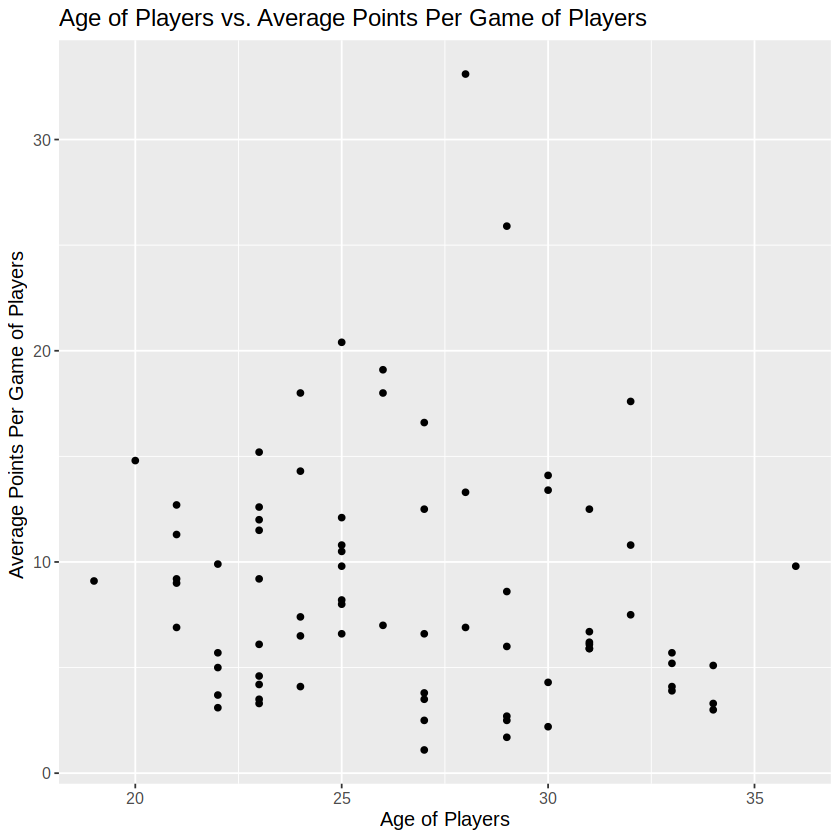

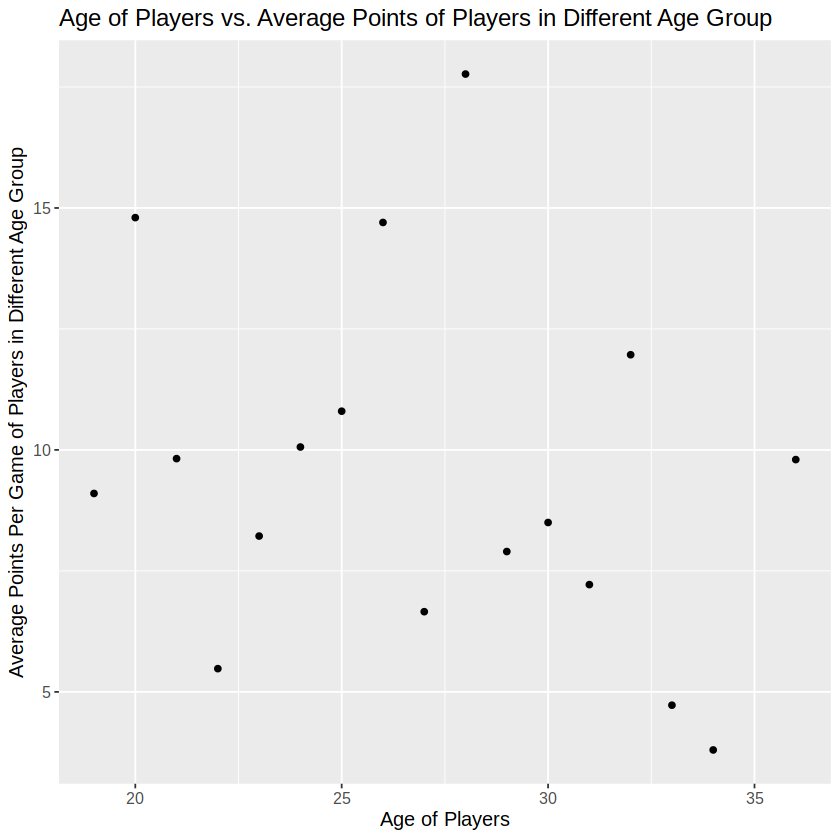

In [33]:
player_data_training_mean <- player_data_training |>
                             group_by(Age) |>
                             summarize(mean_PTS = mean(PTS))
play_plot_3 <- ggplot(player_data_training, aes(x = Age, y = PTS))+
                geom_point() +
                xlab("Age of Players") +
                ylab("Average Points Per Game of Players ") +
                ggtitle("Age of Players vs. Average Points Per Game of Players") +
                theme(text = element_text(size=12))
play_plot_3
play_plot_4 <- ggplot(player_data_training_mean, aes(x = Age, y = mean_PTS))+
                geom_point() +
                xlab("Age of Players") +
                ylab("Average Points Per Game of Players in Different Age Group") +
                ggtitle("Age of Players vs. Average Points of Players in Different Age Group") +
                theme(text = element_text(size=12))
play_plot_4

In [34]:
set.seed(1234)

player_spec <- linear_reg() |>
        set_engine("lm") |>
        set_mode("regression")

player_recipe <- recipe(PTS ~ Age + MP + FGA, data = player_data_training)

player_fit <- workflow() |>
    add_model(player_spec) |>
    add_recipe(player_recipe) |>
    fit(data = player_data_training)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age           MP          FGA  
  -0.463638     0.005035     0.040020     1.389284  


In [35]:
set.seed(1234)

player_fit_results <- player_fit |>
    predict(player_data_testing) |>
    bind_cols(player_data_testing) |>
    metrics(truth = PTS, estimate = .pred)
player_fit_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.9763524
rsq,standard,0.9781085
mae,standard,0.6749787


In [25]:
set.seed(1234) 

player_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression") 

player_knn_recipe <- recipe(PTS ~ Age + MP + FGA, data = player_data_training) |>
       step_scale(all_predictors()) |>
       step_center(all_predictors())

player_knn_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [31]:
set.seed(1234) 

player_vfold <- vfold_cv(player_data_training, v = 5, strata = PTS)

player_knn_workflow <- workflow() |>
                  add_recipe(player_knn_recipe) |>
                  add_model(player_knn_spec) 

player_knn_workflow

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [27]:
set.seed(2019)
install.packages("kknn")
gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 10))
player_results <- player_knn_workflow|>

tune_grid(resamples = player_vfold, grid = gridvals)|>
collect_metrics()
player_results

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1.7205735,5,0.32115429,Preprocessor1_Model1
1,rsq,standard,0.9306435,5,0.01197283,Preprocessor1_Model1


In [29]:
set.seed(2020) 

player_min <- player_results|>
    filter(.metric == "rmse") |>
    slice_min(n = 1, order_by = mean)
player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1.720573,5,0.3211543,Preprocessor1_Model1


In [30]:
set.seed(1234) 

k_min <- player_min |>
          pull(neighbors)

player_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

player_best_fit <- workflow() |>
          add_recipe(player_knn_recipe) |>
          add_model(player_best_spec) |>
          fit(data = player_data_training)

player_summary <- player_best_fit |>
           predict(player_data_testing) |>
           bind_cols(player_data_testing) |>
           metrics(truth = PTS, estimate = .pred)
player_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.1708293
rsq,standard,0.9054299
mae,standard,1.3250000


In [11]:
player_coeffs <- player_fit |>
             extract_fit_parsnip() |>
             tidy()
player_coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.463637784,0.91130673,-0.5087615,6.124968e-01
Age,0.005034831,0.03056474,0.1647268,8.696271e-01
MP,0.040019918,0.02825157,1.4165557,1.609856e-01
FGA,1.389284154,0.06166364,22.5300398,4.545138e-34


By using the linear regression algorithm, and by using the extract_fit_parsnip function to find the coefficients of the predictors we can now create a formula with our predictors to make a prediction of average player points. The formula for the prediction is as follows : 
$Average\:Points\:Per\:Game = -0.463638 + 0.005035 * Player\:Age + 0.040020 * Average\:Minutes\:Player + 1.389284 * Average\:Field\:Goal\:Attempts$

We can also determine the RMSPE of our model, which gives an assessment of how well the algorithm predicts the model based on the training data set we used. The value of the RMSPE we found is 0.9763524, which is in the units of the response variable, in this case as the response variable is average points per game it is in points. Considering that in an NBA game points can only go up by 1,2 or 3, this signifies that our algorithm does a good job of predicting within the training set, with a very low discrepancy between the actual value and the prediction variable. 

However this only applies to our training and testing set, which is subject to change in the real world. Luckily, as the NBA season had just begun recently, we can apply our formula for the prediction to actual NBA players and determine whether our algorithm has actually done a good job in predicting average player points. As previously discussed one application of this prediction is to determine how well a rookie will perform in the NBA. As we chose the center position when producing our algorithm we will be choosing two rookie centers. The two rookies we will be selecting are Victor Wembanyana and Chet Holmgren, two very promising rookies who are also the front runners for the NBA rookie of the year award. We will be using their 2023/2024 regular season stats thus far to make a prediction of their average points per game. 

In [36]:
url <- "https://raw.githubusercontent.com/likaishin/dsci_basketball_project/main/2023-2024%20NBA%20Player%20Stats%20-%20Regular.csv?token=GHSAT0AAAAAACKWXG4PQMDI4GIYXDK3V7XOZLRGHOQ"
NBA_player <- read_delim(url, delim = ";")
NBA_player_data <- NBA_player |>
    mutate(Age = as.numeric(Age),
           PTS = as.numeric(PTS),
           FGA = as.numeric(FGA))
NBA_player_data

Rows: 483 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (3): Player, Pos, Tm
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Precious Achiuwa,C,24,TOR,7,0,20.7,3.0,6.9,⋯,0.857,1.7,4.9,6.6,1.6,0.4,0.4,1.4,2.0,7.1
2,Bam Adebayo,C,26,MIA,12,12,34.8,8.3,15.6,⋯,0.830,2.2,8.0,10.2,3.9,1.3,1.2,2.8,2.3,22.8
3,Ochai Agbaji,SG,23,UTA,12,4,17.8,1.8,4.3,⋯,0.500,0.9,2.0,2.9,0.9,0.3,0.8,0.6,1.4,4.8
4,Santi Aldama,PF,23,MEM,6,0,23.5,5.0,10.5,⋯,0.500,0.8,4.7,5.5,2.0,0.5,0.8,1.8,1.3,12.5
5,Nickeil Alexander-Walker,SG,25,MIN,12,2,19.7,2.1,5.0,⋯,0.333,0.1,1.7,1.8,2.4,0.8,0.8,1.0,1.5,5.4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
467,Thaddeus Young,PF,35,TOR,3,0,3.3,0.7,1.3,⋯,0.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0,1.3
468,Trae Young,PG,25,ATL,11,11,35.7,6.3,17.6,⋯,0.898,0.6,2.0,2.6,11.1,1.5,0.0,4.1,1.5,23.4
469,Omer Yurtseven,C,25,UTA,7,0,4.6,1.0,1.4,⋯,0.500,0.4,1.1,1.6,0.4,0.0,0.1,0.1,0.9,2.3


In [37]:
NBA_player_filter <- filter(NBA_player_data, Player == "Victor Wembanyama" | Player == "Chet Holmgren")
NBA_player_filter

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184,Chet Holmgren,C,21,OKC,13,13,30.3,5.9,10.8,⋯,0.904,1.6,6.3,7.9,2.8,1.0,2.2,2.3,3.0,17.1
442,Victor Wembanyama,PF,20,SAS,13,13,30.2,7.2,16.8,⋯,0.778,2.2,7.4,9.5,2.4,1.1,2.6,3.8,2.8,19.3


In [38]:
NBA_player_select <- select(NBA_player_filter, Player, Age, MP, FGA, PTS)
NBA_player_select

Player,Age,MP,FGA,PTS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Chet Holmgren,21,30.3,10.8,17.1
Victor Wembanyama,20,30.2,16.8,19.3


Now we have the 2023/2024 stats for Chet Holmgren and Victor Wembanyama, we can use their stats to predict a value for the average points they will score this season and compare it to the actual value. 

First, we will do the calculations for Chet Holmgren.

In [39]:
Chet_Holmgren_PTS <- -0.463638 + 0.005035 * 21 + 0.040020 * 30.3 + 1.389284 * 10.8
Chet_Holmgren_PTS

[1] 15.85897

In [40]:
Chet_Percent_Error <- (abs(Chet_Holmgren_PTS - 17.1)/ 17.1) * 100
Chet_Percent_Error

[1] 7.257484

By applying the formula we generated with our linear regression model we obtained a prediction value for Chet Holmgren's average points this season which turned out to be around 15.86 points. By comparing this value with the actual value for Chet Holmgren's average points, which is 17.1, we can calculate a percent error which sums out to be 7.26 percent. 

Now, we will repeat the calculations for Victor Wembanyama. 

In [41]:
Victor_Wembanyama_PTS <- -0.463638 + 0.005035 * 20 + 0.040020 * 30.2 + 1.389284 * 16.8
Victor_Wembanyama_PTS

[1] 24.18564

In [42]:
Victor_Percent_Error <- (abs(Victor_Wembanyama_PTS - 19.3)/ 19.3) * 100
Victor_Percent_Error

[1] 25.31418